In [1]:
import numpy as np
import sympy as sp
import pandas as pd

In [2]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [3]:
x = sp.Symbol('x')
y = sp.Symbol('y')


In [94]:
T = 0.25
A = 100
B = 100
h = 3

f_coef = 70*(10**3) / (40*8 / 12*(1-0.3*0.3)) * 10**(-4)
print f_coef

0.295857988166


In [101]:
columns = np.arange(0, A + h, h)
index = np.arange(0, B + h, h)
values = np.zeros((len(columns), len(index)))

In [102]:
for row_pos in range(len(index)):
    for col_pos in range(len(columns)):
        values[col_pos][row_pos] = 0

In [109]:
mask = []
for row_pos in range(len(index)):
    for col_pos in range(len(columns)):
        if (row_pos**2 + 1.0*(col_pos-17)**2)**(1/2.0) <= 8:
            #print (row_pos**2 + 1.0*(col_pos-8)**2)**(1/2.0)
            mask.append((row_pos, col_pos))
#print mask

In [104]:
eps = 0.01
dmax = 1
iterations = 0
while dmax > eps:
    dmax = 0
    iterations += 1
    for row_pos in range(1, len(index) - 1):
        for col_pos in range(1, len(columns) - 1):
            if not ((col_pos, row_pos)) in mask:
                
                temp = values[col_pos][row_pos]
                values[col_pos][row_pos] = (values[col_pos+1][row_pos] + values[col_pos-1][row_pos] +
                                            values[col_pos][row_pos+1] + values[col_pos][row_pos-1] -
                                            h*h*f_coef)* 0.25    
                dm = abs(temp - values[col_pos][row_pos])
                if (dmax < dm):
                    dmax = dm
print iterations

507


In [105]:
pd.DataFrame(values).applymap(lambda x: round(x, 2))

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
1,0.0,-4.36,-7.34,-9.41,-10.74,-11.40,-11.33,-10.42,-8.47,-5.15,...,-5.15,-8.47,-10.42,-11.33,-11.40,-10.74,-9.41,-7.34,-4.36,0.0
2,0.0,-7.44,-12.93,-16.88,-19.51,-20.85,-20.83,-19.23,-15.65,-9.48,...,-9.48,-15.65,-19.23,-20.83,-20.85,-19.51,-16.88,-12.93,-7.44,0.0
3,0.0,-9.81,-17.38,-23.02,-26.89,-29.01,-29.25,-27.34,-22.75,-14.44,...,-14.45,-22.75,-27.35,-29.26,-29.01,-26.90,-23.03,-17.39,-9.81,0.0
4,0.0,-11.75,-21.11,-28.28,-33.37,-36.37,-37.17,-35.49,-30.90,-22.89,...,-22.89,-30.91,-35.49,-37.17,-36.38,-33.37,-28.29,-21.11,-11.75,0.0
5,0.0,-13.43,-24.36,-32.95,-39.26,-43.28,-44.89,-43.87,-39.83,-32.19,...,-32.19,-39.84,-43.88,-44.91,-43.29,-39.28,-32.96,-24.37,-13.43,0.0
6,0.0,-14.92,-27.31,-37.25,-44.79,-49.94,-52.60,-52.61,-49.69,-43.47,...,-43.48,-49.71,-52.62,-52.62,-49.96,-44.81,-37.26,-27.32,-14.93,0.0
7,0.0,-16.30,-30.03,-41.27,-50.07,-56.42,-60.30,-61.61,-60.21,-55.96,...,-55.98,-60.23,-61.63,-60.32,-56.44,-50.08,-41.29,-30.04,-16.31,0.0
8,0.0,-17.58,-32.59,-45.08,-55.12,-62.73,-67.91,-70.65,-70.93,-68.75,...,-68.77,-70.95,-70.68,-67.94,-62.75,-55.14,-45.10,-32.60,-17.59,0.0
9,0.0,-18.79,-34.99,-48.69,-59.94,-68.80,-75.31,-79.51,-81.44,-81.22,...,-81.25,-81.47,-79.53,-75.34,-68.83,-59.96,-48.71,-35.00,-18.79,0.0


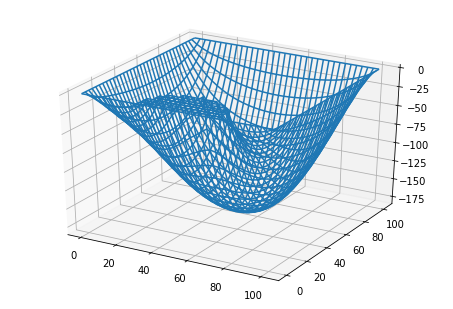

In [110]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

xs, ys = np.meshgrid(index, columns)
zs = values
fig = plt.figure()
ax = Axes3D(fig)
#ax.plot_surface(xs, ys, zs, rstride=1, cstride=1, cmap='hot')
ax.plot_wireframe(xs, ys, zs)
plt.show()